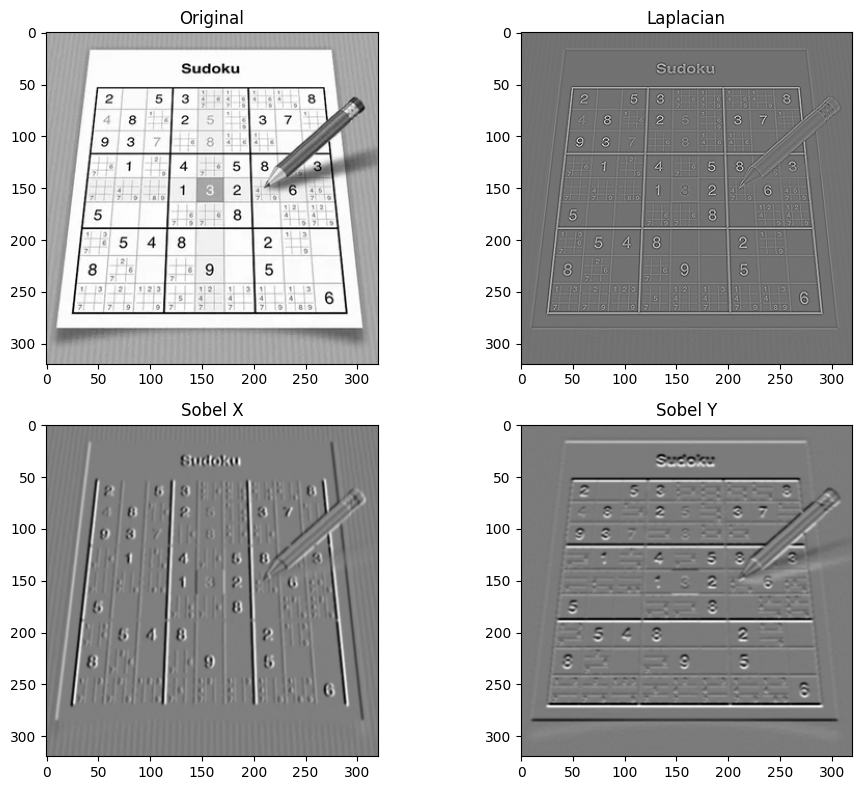

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Сравнение Лаплас и Собель

img = cv.imread('../lab3/sudoku.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден"

# Laplacian
# Вычисляет вторую производную (чувствителен к резким перепадам яркости)
laplacian = cv.Laplacian(img, cv.CV_64F)

# Sobel X и Sobel Y
# Первая производная по X и по Y соответственно
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)


plt.figure(figsize=(10,8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(2,2,2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')

plt.subplot(2,2,3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')

plt.subplot(2,2,4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')

plt.tight_layout()
plt.show()

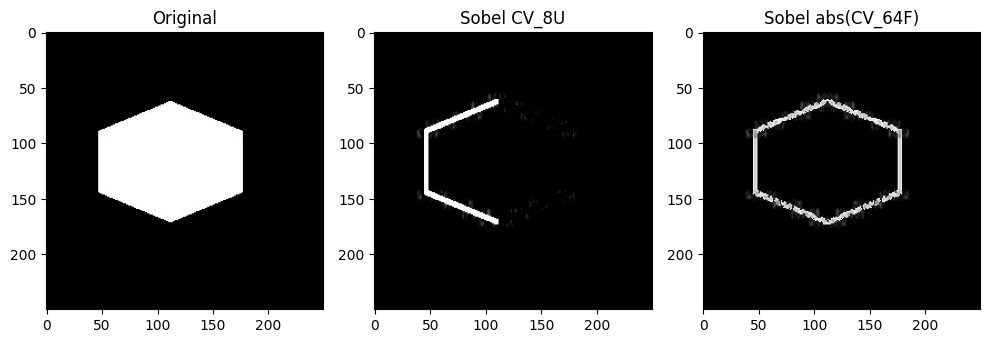

In [10]:
# Разница между CV_8U и CV_64F
img2 = cv.imread('./figure.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден"

# Sobel с типом CV_8U
# Отрицательные значения усекаются (обрезаются до 0)
sobelx8u = cv.Sobel(img2, cv.CV_8U, 1, 0, ksize=5)

# Sobel с типом CV_64F
# Сохраняет отрицательные значения, затем берём модуль и преобразуем в uint8
sobelx64f = cv.Sobel(img2, cv.CV_64F, 1, 0, ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)


plt.figure(figsize=(10,4))
plt.subplot(1,3,1), plt.imshow(img2, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2), plt.imshow(sobelx8u, cmap='gray')
plt.title('Sobel CV_8U')

plt.subplot(1,3,3), plt.imshow(sobel_8u, cmap='gray')
plt.title('Sobel abs(CV_64F)')

plt.tight_layout()
plt.show()